In [1618]:
#Loading libraries
library(tidyverse)
library(gapminder)
library(tidyr)
library(tidyverse)
library(ggplot2)
library(broom)
library(reshape2)
require(gridExtra)
library(grid)

## Data reading, cleaning and restructuring

* We have gathered many features which might affect the GDP per capita of a country.
* We are using [World Bank](https://data.worldbank.org/indicator) data to get all the features.
* In the next few lines of code we will be reading various features and joining them into one data frame.
* Some of the features may not be used in analysis but has been included for future analysis.

In [1619]:
#Reading and cleaning GDP per Capita data
gpc <- read_csv('Data/raw/GdpPerCapita/gdpPerCapita.csv',skip = 4) 
gpc <- gpc %>%
    select(-`Indicator Name`,-`Indicator Code`,-`X65`,-`2019`) %>%
    rename(Country = `Country Name`,Code = `Country Code`)
gpc %>% head()

Warning message:
“Missing column names filled in: 'X65' [65]”Parsed with column specification:
cols(
  .default = col_double(),
  `Country Name` = col_character(),
  `Country Code` = col_character(),
  `Indicator Name` = col_character(),
  `Indicator Code` = col_character(),
  `2019` = col_logical(),
  X65 = col_logical()
)
See spec(...) for full column specifications.


Country,Code,1960,1961,1962,1963,1964,1965,1966,1967,⋯,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Aruba,ABW,NA,NA,NA,NA,NA,NA,NA,NA,⋯,24630.454,23512.603,24985.9933,24713.698,25025.100,25533.5698,25796.3803,25239.6004,25630.2665,NA
Afghanistan,AFG,59.77319,59.86087,58.45801,78.70639,82.09523,101.1083,137.5944,160.8986,⋯,438.076,543.303,591.1623,641.872,637.165,613.8563,578.4664,547.2281,556.3021,520.8966
Angola,AGO,NA,NA,NA,NA,NA,NA,NA,NA,⋯,3122.781,3587.884,4615.4680,5100.096,5254.882,5408.4105,4166.9797,3506.0729,4095.8129,3432.3857
Albania,ALB,NA,NA,NA,NA,NA,NA,NA,NA,⋯,4114.140,4094.362,4437.1781,4247.614,4413.082,4578.6667,3952.8295,4124.1089,4532.8902,5268.8485
Andorra,AND,NA,NA,NA,NA,NA,NA,NA,NA,⋯,43338.867,39736.354,41100.7299,38392.944,40626.752,42300.3341,36039.6535,37224.1089,39134.3934,42029.7627
Arab World,ARB,NA,NA,NA,NA,NA,NA,NA,NA,⋯,5182.727,5946.259,6890.1055,7504.533,7552.720,7498.9383,6458.8702,6213.7852,6279.4674,6608.8070


In [1620]:
# Gathering all the years column into one
gpc_gath <- gpc %>%
    gather(key = 'Year',value = 'gdpPerCap',-`Country`,-`Code`)
gpc_gath %>% head()

Country,Code,Year,gdpPerCap
<chr>,<chr>,<chr>,<dbl>
Aruba,ABW,1960,NA
Afghanistan,AFG,1960,59.77319
Angola,AGO,1960,NA
Albania,ALB,1960,NA
Andorra,AND,1960,NA
Arab World,ARB,1960,NA


In [1621]:
#Reading literacy rate data
lit <- read_csv('Data/raw/literacyRateWorldBank/literacy.csv',skip = 4) 
lit <- lit %>%
    select(-`Indicator Name`,-`Indicator Code`,-`X65`,-`2019`) %>%
    rename(Country = `Country Name`,Code = `Country Code`)
lit %>% head()

Warning message:
“Missing column names filled in: 'X65' [65]”Parsed with column specification:
cols(
  .default = col_double(),
  `Country Name` = col_character(),
  `Country Code` = col_character(),
  `Indicator Name` = col_character(),
  `Indicator Code` = col_character(),
  `1960` = col_logical(),
  `1961` = col_logical(),
  `1962` = col_logical(),
  `1963` = col_logical(),
  `1964` = col_logical(),
  `1965` = col_logical(),
  `1966` = col_logical(),
  `1967` = col_logical(),
  `1968` = col_logical(),
  `1969` = col_logical(),
  `1971` = col_logical(),
  `2019` = col_logical(),
  X65 = col_logical()
)
See spec(...) for full column specifications.


Country,Code,1960,1961,1962,1963,1964,1965,1966,1967,⋯,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Aruba,ABW,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,96.82264,NA,NA,NA,NA,NA,NA,NA,97.80742
Afghanistan,AFG,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,31.74112,NA,NA,NA,NA,NA,NA,43.01972
Angola,AGO,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,66.03011,NA,NA,NA,NA
Albania,ALB,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,96.84530,97.24697,NA,NA,NA,NA,NA,98.14115
Andorra,AND,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Arab World,ARB,NA,NA,NA,NA,NA,NA,NA,NA,⋯,69.80552,70.76441,72.59386,73.72170,73.94749,74.61962,75.11764,73.69399,74.47393,74.59660


In [1622]:
# Cleaning literacy data
lit_gath <- lit %>%
    gather(key = 'Year',value = 'literacy',-`Country`,-`Code`)
lit_gath %>% head()

Country,Code,Year,literacy
<chr>,<chr>,<chr>,<dbl>
Aruba,ABW,1960,NA
Afghanistan,AFG,1960,NA
Angola,AGO,1960,NA
Albania,ALB,1960,NA
Andorra,AND,1960,NA
Arab World,ARB,1960,NA


In [1623]:
# Joining literacy data to our main data frame having all the features
all_data <- left_join(gpc_clean,select(lit_gath,Code,Year,literacy), by = c('Code','Year')) 
all_data %>% head()

Country,Code,Year,gdpPerCap,literacy
<chr>,<chr>,<chr>,<dbl>,<dbl>
Afghanistan,AFG,1960,59.77319,NA
Australia,AUS,1960,1807.78571,NA
Austria,AUT,1960,935.46043,NA
Burundi,BDI,1960,70.05173,NA
Belgium,BEL,1960,1273.69166,NA
Benin,BEN,1960,93.02251,NA


In [1624]:
#Reading population density data
pdn <- read_csv('Data/raw/popDensity/popDensity.csv',skip = 4) 
pdn <- pdn %>%
    select(-`Indicator Name`,-`Indicator Code`,-`X65`,-`1960`,-`2019`) %>%
    rename(Country = `Country Name`,Code = `Country Code`)
pdn %>% head()

Warning message:
“Missing column names filled in: 'X65' [65]”Parsed with column specification:
cols(
  .default = col_double(),
  `Country Name` = col_character(),
  `Country Code` = col_character(),
  `Indicator Name` = col_character(),
  `Indicator Code` = col_character(),
  `1960` = col_logical(),
  `2019` = col_logical(),
  X65 = col_logical()
)
See spec(...) for full column specifications.


Country,Code,1961,1962,1963,1964,1965,1966,1967,1968,⋯,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Aruba,ABW,307.988889,312.361111,314.972222,316.844444,318.666667,320.638889,322.527778,324.366667,⋯,563.63889,564.82778,566.92222,569.77778,573.10556,576.52222,579.67222,582.62222,585.36667,588.02778
Afghanistan,AFG,14.044987,14.323808,14.617537,14.926295,15.250314,15.585020,15.929795,16.293023,⋯,43.49296,44.70408,46.13150,47.73056,49.42804,51.11478,52.71207,54.19711,55.59599,56.93776
Angola,AGO,4.436891,4.498708,4.555593,4.600180,4.628676,4.637213,4.631622,4.629544,⋯,18.05910,18.73446,19.42782,20.13951,20.86771,21.61047,22.36655,23.13506,23.91654,24.71305
Albania,ALB,60.576642,62.456898,64.329234,66.209307,68.058066,69.874927,71.737153,73.805547,⋯,106.84376,106.31464,106.02901,105.85405,105.66029,105.44175,105.13515,104.96719,104.87069,104.61226
Andorra,AND,30.585106,32.702128,34.919149,37.168085,39.465957,41.802128,44.165957,46.574468,⋯,179.70851,179.67872,178.18511,175.37660,171.85957,168.53830,165.98085,164.46170,163.83191,163.84255
Arab World,ARB,8.430860,8.663154,8.903441,9.152526,9.410965,9.679951,9.959490,10.247580,⋯,30.85858,31.59402,32.33012,33.06767,33.80379,34.53398,35.25690,35.96876,36.66980,37.37237


In [1625]:
# Cleaning population density data
pdn_gath <- pdn %>%
    gather(key = 'Year',value = 'popDensity',-`Country`,-`Code`)
pdn_gath %>% head()

Country,Code,Year,popDensity
<chr>,<chr>,<chr>,<dbl>
Aruba,ABW,1961,307.988889
Afghanistan,AFG,1961,14.044987
Angola,AGO,1961,4.436891
Albania,ALB,1961,60.576642
Andorra,AND,1961,30.585106
Arab World,ARB,1961,8.430860


In [1626]:
# Joining population density to main data frame having all other features
all_data <- left_join(all_data,select(pdn_gath,Code,Year,popDensity), by = c('Code','Year')) 
all_data %>% head()

Country,Code,Year,gdpPerCap,literacy,popDensity
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,1960,59.77319,NA,NA
Australia,AUS,1960,1807.78571,NA,NA
Austria,AUT,1960,935.46043,NA,NA
Burundi,BDI,1960,70.05173,NA,NA
Belgium,BEL,1960,1273.69166,NA,NA
Benin,BEN,1960,93.02251,NA,NA


In [1627]:
#Reading population density data
pvt <- read_csv('Data/raw/povertyData/poverty.csv',skip = 4) 
pvt <- pvt %>%
    select(-`X65`,-`1960`,-`2019`) %>%
    rename(Country = `Country Name`,Code = `Country Code`) %>%
    filter(`Indicator Code` %in% c('SI.POV.LMIC','EN.POP.SLUM.UR.ZS'))

pvt %>% head()

Warning message:
“Missing column names filled in: 'X65' [65]”Parsed with column specification:
cols(
  .default = col_double(),
  `Country Name` = col_character(),
  `Country Code` = col_character(),
  `Indicator Name` = col_character(),
  `Indicator Code` = col_character(),
  `1960` = col_logical(),
  `1961` = col_logical(),
  `1962` = col_logical(),
  `1963` = col_logical(),
  `1964` = col_logical(),
  `1965` = col_logical(),
  `1966` = col_logical(),
  `1967` = col_logical(),
  `1968` = col_logical(),
  `1969` = col_logical(),
  `1970` = col_logical(),
  `1971` = col_logical(),
  `1972` = col_logical(),
  `1973` = col_logical(),
  `1974` = col_logical(),
  `1975` = col_logical()
  # ... with 6 more columns
)
See spec(...) for full column specifications.
Warning message:
“45 parsing failures.
 row  col           expected actual                               file
2682 1977 1/0/T/F/TRUE/FALSE   65   'Data/raw/povertyData/poverty.csv'
2683 1977 1/0/T/F/TRUE/FALSE   97   'Data/raw/povert

Country,Code,Indicator Name,Indicator Code,1961,1962,1963,1964,1965,1966,⋯,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Aruba,ABW,Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population),SI.POV.LMIC,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Aruba,ABW,Population living in slums (% of urban population),EN.POP.SLUM.UR.ZS,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AFG,Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population),SI.POV.LMIC,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AFG,Population living in slums (% of urban population),EN.POP.SLUM.UR.ZS,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,62.7,NA,NA,NA,NA
Angola,AGO,Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population),SI.POV.LMIC,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Angola,AGO,Population living in slums (% of urban population),EN.POP.SLUM.UR.ZS,NA,NA,NA,NA,NA,NA,⋯,65.8,NA,NA,NA,NA,55.5,NA,NA,NA,NA


In [1628]:
# Cleaning poverty data
pvt_gath <- pvt %>%
    gather(key = 'Year',value = 'value',-`Country`,-`Code`,-`Indicator Name`,-`Indicator Code`) %>%
    select(-`Indicator Name`) %>%
    spread(key = `Indicator Code`,value = `value`) %>%
    rename(under_slum = `EN.POP.SLUM.UR.ZS`,below_poverty = `SI.POV.LMIC` ) 
pvt_gath %>% head()

Country,Code,Year,under_slum,below_poverty
<chr>,<chr>,<chr>,<dbl>,<dbl>
Afghanistan,AFG,1961,NA,NA
Afghanistan,AFG,1962,NA,NA
Afghanistan,AFG,1963,NA,NA
Afghanistan,AFG,1964,NA,NA
Afghanistan,AFG,1965,NA,NA
Afghanistan,AFG,1966,NA,NA


In [1629]:
# Joining poverty data to the main dataframe containing all other features
all_data <- left_join(all_data,select(pvt_gath,Code,Year,under_slum,below_poverty), by = c('Code','Year')) 
all_data %>% head()

Country,Code,Year,gdpPerCap,literacy,popDensity,under_slum,below_poverty
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,1960,59.77319,NA,NA,NA,NA
Australia,AUS,1960,1807.78571,NA,NA,NA,NA
Austria,AUT,1960,935.46043,NA,NA,NA,NA
Burundi,BDI,1960,70.05173,NA,NA,NA,NA
Belgium,BEL,1960,1273.69166,NA,NA,NA,NA
Benin,BEN,1960,93.02251,NA,NA,NA,NA


In [1630]:
#Reading import data
imp <- read_csv("Data/raw/importData.csv") 
imp <- imp %>%
    select(-2,-3,-4,-5) %>%
    rename(Country = `Reporter Name`)

imp %>% head()

Parsed with column specification:
cols(
  .default = col_double(),
  `Reporter Name` = col_character(),
  `Partner Name` = col_character(),
  `Trade Flow` = col_character(),
  `Product Group` = col_character(),
  Indicator = col_character()
)
See spec(...) for full column specifications.


Country,1988,1989,1990,1991,1992,1993,1994,1995,1996,⋯,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,3019860.1,3336435,5154250,6390311,6204984,8554414,7697178,7722865,6534140,NA
Albania,NA,NA,NA,NA,NA,NA,NA,NA,938481.8,⋯,5250490.0,4548288,4602775,5395853,4879830,4880593,5229972,4320219,4669290,5717083
Algeria,NA,NA,NA,NA,8647816,8785275,9598674,10782432,9105595.4,⋯,39474721.6,39258327,40999891,47219730,50369391,54909973,58618080,51803071,47090684,46053016
Andorra,NA,NA,NA,NA,NA,NA,NA,1025481,1061358.4,⋯,1939929.7,1610111,1540506,1617691,1417734,1487194,1556049,NA,NA,NA
Angola,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,23918854,18143269,20790996,28722984,26756063,28753499,16757790,NA,NA
Anguila,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,271744.4,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [1631]:
#Cleaning import data
imp_gath <- imp %>%
    gather(key = "Year",value = "Import",-Country)
imp_gath %>% head()

Country,Year,Import
<chr>,<chr>,<dbl>
Afghanistan,1988,NA
Albania,1988,NA
Algeria,1988,NA
Andorra,1988,NA
Angola,1988,NA
Anguila,1988,NA


In [1632]:
# Joining import data to the main dataframe having all other features
all_data <- left_join(all_data, imp_gath, by = c('Country','Year'))
all_data %>% head()

Country,Code,Year,gdpPerCap,literacy,popDensity,under_slum,below_poverty,Import
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,1960,59.77319,NA,NA,NA,NA,NA
Australia,AUS,1960,1807.78571,NA,NA,NA,NA,NA
Austria,AUT,1960,935.46043,NA,NA,NA,NA,NA
Burundi,BDI,1960,70.05173,NA,NA,NA,NA,NA
Belgium,BEL,1960,1273.69166,NA,NA,NA,NA,NA
Benin,BEN,1960,93.02251,NA,NA,NA,NA,NA


In [1633]:
# Reading export data
exp <- read_csv("Data/raw/exportData.csv") 
exp <- exp %>%
    select(-2,-3,-4,-5) %>%
    rename(Country = `Reporter Name`)

exp %>% head()

Parsed with column specification:
cols(
  .default = col_double(),
  `Reporter Name` = col_character(),
  `Partner Name` = col_character(),
  `Trade Flow` = col_character(),
  `Product Group` = col_character(),
  Indicator = col_character()
)
See spec(...) for full column specifications.


Country,1988,1989,1990,1991,1992,1993,1994,1995,1996,⋯,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,540065.59,403441.0,388483.64,375850.9,428902.7,514972.98,570534.01,571405,596455.3,NA
Albania,NA,NA,NA,NA,NA,NA,NA,NA,211140.40,⋯,1354921.65,1087914.9,1549955.72,1948207.3,1967918.9,2331521.93,2430723.64,1929657,1962117.4,2261556
Algeria,NA,NA,NA,NA,11136802,10097665,8593806,9356680.19,11099222.02,⋯,79297591.51,45193920.2,57050973.57,73436306.1,71865749.0,65998137.60,60387689.30,34795951,29992101.5,35191117
Andorra,NA,NA,NA,NA,NA,NA,NA,47803.14,46242.98,⋯,139099.35,100477.9,92318.97,114022.7,105949.6,98978.05,94780.86,NA,NA,NA
Angola,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,40639411.7,52612114.76,66427390.2,70863076.4,67712526.55,58672369.19,33047779,NA,NA
Anguila,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,11474.54,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [1634]:
# Cleaning export data
exp_gath <- exp %>%
    gather(key = "Year",value = "Export",-Country)
exp_gath %>% head()

Country,Year,Export
<chr>,<chr>,<dbl>
Afghanistan,1988,NA
Albania,1988,NA
Algeria,1988,NA
Andorra,1988,NA
Angola,1988,NA
Anguila,1988,NA


In [1635]:
# Joining export data to the main data frame having all other features
all_data <- left_join(all_data, exp_gath, by = c('Country','Year')) %>%
    transform(Year = as.numeric(Year)) 
all_data %>% head()

Country,Code,Year,gdpPerCap,literacy,popDensity,under_slum,below_poverty,Import,Export
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,1960,59.77319,NA,NA,NA,NA,NA,NA
Australia,AUS,1960,1807.78571,NA,NA,NA,NA,NA,NA
Austria,AUT,1960,935.46043,NA,NA,NA,NA,NA,NA
Burundi,BDI,1960,70.05173,NA,NA,NA,NA,NA,NA
Belgium,BEL,1960,1273.69166,NA,NA,NA,NA,NA,NA
Benin,BEN,1960,93.02251,NA,NA,NA,NA,NA,NA


In [1636]:
#Reading governance data
gov <- read_csv("Data/raw/governance_indicator/governance.csv")

Parsed with column specification:
cols(
  .default = col_character(),
  `2010 [YR2010]` = col_double(),
  `2009 [YR2009]` = col_double()
)
See spec(...) for full column specifications.
Warning message:
“114 parsing failures.
 row           col expected actual                                           file
1747 2010 [YR2010] a double     .. 'Data/raw/governance_indicator/governance.csv'
1747 2009 [YR2009] a double     .. 'Data/raw/governance_indicator/governance.csv'
1748 2010 [YR2010] a double     .. 'Data/raw/governance_indicator/governance.csv'
1748 2009 [YR2009] a double     .. 'Data/raw/governance_indicator/governance.csv'
1749 2010 [YR2010] a double     .. 'Data/raw/governance_indicator/governance.csv'
.... ............. ........ ...... ..............................................
See problems(...) for more details.
”

In [1637]:
# Reading governance data
gov_clean <- gov %>% 
    gather(key = Year, value = Value , -1,-2,-3,-4) %>%
    filter(`Series Code` %in% c('CC.EST','GE.EST','PV.EST'))%>%
    mutate(Year = as.numeric(str_sub(Year,1,4)))%>%
    select(-`Series Name`)%>%
    spread(key = `Series Code`,value = Value) %>%
    rename(Country = `Country Name`,Code = `Country Code`,Corruption = `CC.EST`,GovEff=`GE.EST`,PolSta = `PV.EST`) %>%
    select(-Country) %>%
    mutate(Corruption = as.numeric(Corruption),GovEff = as.numeric(GovEff),PolSta = as.numeric(PolSta))
head(gov_clean)

Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”

Code,Year,Corruption,GovEff,PolSta
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
AFG,1996,-1.291705,-2.1751670,-2.414042
AFG,1998,-1.180848,-2.1359420,-2.422996
AFG,2000,-1.295380,-2.2316510,-2.440187
AFG,2002,-1.263366,-1.5679730,-2.035389
AFG,2003,-1.351042,-1.0824880,-2.197809
AFG,2004,-1.345281,-0.8940507,-2.296179


In [1638]:
# Joining governance data to the main dataframe having all other features
all_data <- left_join(all_data,gov_clean,by = c('Code','Year'))
head(all_data)

Country,Code,Year,gdpPerCap,literacy,popDensity,under_slum,below_poverty,Import,Export,Corruption,GovEff,PolSta
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,1960,59.77319,NA,NA,NA,NA,NA,NA,NA,NA,NA
Australia,AUS,1960,1807.78571,NA,NA,NA,NA,NA,NA,NA,NA,NA
Austria,AUT,1960,935.46043,NA,NA,NA,NA,NA,NA,NA,NA,NA
Burundi,BDI,1960,70.05173,NA,NA,NA,NA,NA,NA,NA,NA,NA
Belgium,BEL,1960,1273.69166,NA,NA,NA,NA,NA,NA,NA,NA,NA
Benin,BEN,1960,93.02251,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [1639]:
# Reading adult mortality data
mortality <- read_csv('Data/raw/adultMortality.csv',skip = 1)%>%
    rename(adult_mortality = `Both sexes`)
head(mortality)

Parsed with column specification:
cols(
  Country = col_character(),
  Year = col_double(),
  `Both sexes` = col_double(),
  Male = col_double(),
  Female = col_double()
)


Country,Year,adult_mortality,Male,Female
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2016,245,272,216
Afghanistan,2015,233,254,210
Afghanistan,2014,234,254,213
Afghanistan,2013,235,254,215
Afghanistan,2012,242,262,221
Afghanistan,2011,248,268,227


In [1640]:
# Joining adult mortality data to the main dataframe  having all other features
all_data <- left_join(all_data,mortality,by= c('Country','Year'))

In [1641]:
all_data %>% head()

Country,Code,Year,gdpPerCap,literacy,popDensity,under_slum,below_poverty,Import,Export,Corruption,GovEff,PolSta,adult_mortality,Male,Female
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,1960,59.77319,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Australia,AUS,1960,1807.78571,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Austria,AUT,1960,935.46043,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Burundi,BDI,1960,70.05173,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Belgium,BEL,1960,1273.69166,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Benin,BEN,1960,93.02251,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [1642]:
write_csv(all_data,'Data/clean/all_data.csv')

In [1643]:
# Calculating number of non null rows in the main dataframe
all_clean_data <- drop_na(all_data)
all_clean_data %>% nrow()

[1] 32

In [1644]:
#' Returns correlation matrix of the input list of columns of the main dataframe
#'and prints number of non null rows for the given set of columns
#'
#' @param ... Comma separated columns whose correlation matrix needs to be calculated
#'
#' @result Correlation matrix of the input row
#'
#' @example
#' calc_cor(literacy,gdpPerCapita)
calc_cor <- function(...){
    filt_data <- all_data %>%
        select(...) %>%
        drop_na()
    print(paste("no. of rows = ",nrow(filt_data)))
    cor(filt_data)
}


#' Returns a vector of number of non null row, the correlation of the input 
#' columns and the nale of the second column
#'
#' @param ... Comma separated columns. The function is meant to run only for two inputs
#'
#' @result Vector of number of non null row, their correlation and the name of second column whose correlation needs to be calulated
#'
#' @example
#' calc_rows(lgdpPerCapita,iteracy)
cor_rows <- function(...){
    filt_data <- all_data %>%
        select(...) %>%
        drop_na()
    rows <- nrow(filt_data)
    cor_mat <- cor(filt_data)
    col <- colnames(filt_data)[2]
    c(rows,cor_mat[1,2], col)
}

## Social Factors impacting GDP per Capita

We will be investigating the following social factors and try to find out which factors impact GDP per Capita the most:

1. Literacy
2. Percentage of urban population under slum
3. Percentage of people earning less than $1.3 per day
4. Corruption
5. Government Effectiveness
6. Political Stability
7. Adult Mortality

In [1645]:
head(all_data)

Country,Code,Year,gdpPerCap,literacy,popDensity,under_slum,below_poverty,Import,Export,Corruption,GovEff,PolSta,adult_mortality,Male,Female
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,1960,59.77319,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Australia,AUS,1960,1807.78571,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Austria,AUT,1960,935.46043,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Burundi,BDI,1960,70.05173,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Belgium,BEL,1960,1273.69166,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Benin,BEN,1960,93.02251,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


We will check individual correlation of each explanatory variable with GDP per capita and also see how many rows are contributing in the calculation of correlation.

In [1646]:
# Calculating individual correlation of each variable to GDP per Capita
cols = c(5,7,8,11,12,13,14)
i = 1
num_rows = vector("double",length(cols))
cor = vector("double",length(cols))
col_name = vector("character",length(cols))
for(col in cols){
    out <- cor_rows(gdpPerCap,col)
    num_rows[i] <- out[1]
    cor[i] <- out[2]
    col_name[i] <- out[3]
    i = i + 1
}

cor_df = tibble(columns = col_name, cor_with_gdpPerCap = cor, num_rows = num_rows)
cor_df

columns,cor_with_gdpPerCap,num_rows
<chr>,<chr>,<chr>
literacy,0.434958240154401,2321
under_slum,-0.584522550997509,613
below_poverty,-0.489023240364821,1650
Corruption,0.709422647163046,3879
GovEff,0.715701377557888,3866
PolSta,0.490245513522648,3888
adult_mortality,-0.506846999888662,2630


In [1647]:
# Overall correlation matrix for all the 7 social factors and the dependent variable GDP per Capita
calc_cor(4,5,7,8,11,12,13,14) 

[1] "no. of rows =  33"


,gdpPerCap,literacy,under_slum,below_poverty,Corruption,GovEff,PolSta,adult_mortality
gdpPerCap,1.0000000,0.6139620,-0.7323959,-0.8031005,0.49250822,0.71533006,0.33672158,-0.6102630
literacy,0.6139620,1.0000000,-0.8196033,-0.8144164,0.34875600,0.49943838,0.18417907,-0.5773224
under_slum,-0.7323959,-0.8196033,1.0000000,0.8556470,-0.38377983,-0.63305809,-0.17286795,0.7145471
below_poverty,-0.8031005,-0.8144164,0.8556470,1.0000000,-0.42322369,-0.49753401,-0.31063888,0.8180963
Corruption,0.4925082,0.3487560,-0.3837798,-0.4232237,1.00000000,0.67938944,-0.06933345,-0.3374632
GovEff,0.7153301,0.4994384,-0.6330581,-0.4975340,0.67938944,1.00000000,-0.03142046,-0.4063070
PolSta,0.3367216,0.1841791,-0.1728679,-0.3106389,-0.06933345,-0.03142046,1.00000000,-0.1257701
adult_mortality,-0.6102630,-0.5773224,0.7145471,0.8180963,-0.33746322,-0.40630696,-0.12577007,1.0000000


* If we combine all the factors we only have 33 non null rows and there are 7 explanatory variables. This will cause curse of dimensionality and we will not get significant results.
* We need to identify the explanatory variables which can introduce collinearity or the ones which are highly correlated.
* In the above matrix we can observe `literacy` has very high correlation with `under_slum`,`below_poverty`.
* Let us try to analyze `literacy`,`under_slum` and `below_poverty` to see if any factor can be eliminated among these 3.

In [1648]:
calc_cor(4,5,7,8)

[1] "no. of rows =  61"


,gdpPerCap,literacy,under_slum,below_poverty
gdpPerCap,1.0000000,0.6666279,-0.7760916,-0.7855305
literacy,0.6666279,1.0000000,-0.8294281,-0.7706087
under_slum,-0.7760916,-0.8294281,1.0000000,0.8293973
below_poverty,-0.7855305,-0.7706087,0.8293973,1.0000000


* When analyzing only `literacy`,`under_slum` and `below_poverty` separately we have 61 data points and 3 explanatory variables.
* `under_slum` has very high correlation with `literacy`. This might lead to collinearity. Now we will develop a linear model based on only these three variable to check which variable can cause collinearity so that we can eliminate that variable.

In [1649]:
data_lub <- all_data[c(4,5,7,8)] %>% drop_na()
model_lub <- lm(gdpPerCap~.,data_lub)
tidy(model_lub)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),10019.71844,3109.50454,3.2222878,0.002104083
literacy,-10.22192,28.68082,-0.3564026,0.722855006
under_slum,-79.77100,30.00933,-2.6582063,0.010177199
below_poverty,-57.07975,17.29669,-3.3000391,0.001670675


* The correlation of `literacy` with `gdpPerCap` is positive but the coefficient of `literacy` is coming as negative. Also the p value is large as compared to zero.
* This indicates that there is collinearity.
* Now we will check the VIF score and drop the column contributing to collinearity.

In [1650]:
car::vif(model_lub)

literacy    under_slum below_poverty 
     3.446564      4.485304      3.445999

The VIF of `under_slum` is maximum among the three explanatory variable. So we will drop this variable from our model.

In [1651]:
data_lb <- all_data[c(4,5,8)] %>% drop_na()
model_lb <- lm(gdpPerCap~.,data_lb)
tidy(model_lb)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),5066.05725,2435.48889,2.080099,3.807684e-02
literacy,56.44996,24.66407,2.288752,2.255223e-02
below_poverty,-116.97599,14.77064,-7.919496,1.851383e-14


In [1652]:
car::vif(model_lb)

literacy below_poverty 
     2.772011      2.772011

Now we can see the coefficient of `literacy` has become positive and it has become significant at the significance level of 5%. Also the VIF value is less.

In [1653]:
all_data[c(4,5,8,11,12,13,14)] %>% head()

gdpPerCap,literacy,below_poverty,Corruption,GovEff,PolSta,adult_mortality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
59.77319,NA,NA,NA,NA,NA,NA
1807.78571,NA,NA,NA,NA,NA,NA
935.46043,NA,NA,NA,NA,NA,NA
70.05173,NA,NA,NA,NA,NA,NA
1273.69166,NA,NA,NA,NA,NA,NA
93.02251,NA,NA,NA,NA,NA,NA


In [1654]:
calc_cor(4,5,8,11,12,13,14)

[1] "no. of rows =  223"


,gdpPerCap,literacy,below_poverty,Corruption,GovEff,PolSta,adult_mortality
gdpPerCap,1.0000000,0.4491850,-0.5663066,0.6753172,0.7579853,0.3908574,-0.5527659
literacy,0.4491850,1.0000000,-0.7820910,0.3107160,0.4491640,0.2819792,-0.5658814
below_poverty,-0.5663066,-0.7820910,1.0000000,-0.4326988,-0.5552846,-0.3937494,0.7287900
Corruption,0.6753172,0.3107160,-0.4326988,1.0000000,0.8500096,0.5217687,-0.4346788
GovEff,0.7579853,0.4491640,-0.5552846,0.8500096,1.0000000,0.4192170,-0.5184319
PolSta,0.3908574,0.2819792,-0.3937494,0.5217687,0.4192170,1.0000000,-0.1856831
adult_mortality,-0.5527659,-0.5658814,0.7287900,-0.4346788,-0.5184319,-0.1856831,1.0000000


* In the correlation matrix we can see there is very high correlation between `GovEff` and `Corruption`. The correlation value is 0.85. This might lead to collinearity. So we will build a model using the rest 6 explanatory variables to check whether the model suffers from collinearity or not.

In [1655]:
model_lbcgpa <- lm(all_data[c(4,5,8,11,12,13,14)] %>% drop_na())
tidy(model_lbcgpa)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),11724.790140,3663.005827,3.200866,1.576562e-03
literacy,4.830157,36.581857,0.132037,8.950780e-01
below_poverty,-29.867834,27.978194,-1.067540,2.869198e-01
Corruption,1107.635056,998.866482,1.108892,2.687099e-01
GovEff,6484.413571,1115.484104,5.813094,2.183663e-08
PolSta,584.890654,548.159260,1.067009,2.871591e-01
adult_mortality,-15.087502,6.036822,-2.499246,1.319021e-02


In [1656]:
car::vif(model_lbcgpa)

literacy   below_poverty      Corruption          GovEff          PolSta 
       2.618615        4.295422        4.382982        4.440930        1.591668 
adult_mortality 
       2.397496

In [1657]:
glance(model_lbcgpa)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0.6219725,0.6114718,4880.627,59.23117,5.529667e-43,7,-2206.813,4429.625,4456.883,5145232833,216


Here we can see that except `GovEff` and `adult_mortality` all estimates are not significant at 5% significance level. As expected we can see that `Corruption` here has very high VIF. In fact both `Corruption` and `GovEff` have similar VIF. But we will drop `Corruption` as `GovEff` has higher correlation with `gdpPerCap` as compared to `Corruption`. Also the p value for `GovEff` is the smallest in the above model.

In [1658]:
model_lbgpa <- lm(all_data[c(4,5,8,12,13,14)] %>% drop_na())
tidy(model_lbgpa)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),12142.3147276,3645.530210,3.3307404,1.017876e-03
literacy,0.3830039,36.380596,0.0105277,9.916099e-01
below_poverty,-26.1608017,27.792449,-0.9412917,3.476021e-01
GovEff,7462.6085081,683.104650,10.9245465,2.015003e-22
PolSta,824.6889249,503.967122,1.6363943,1.032066e-01
adult_mortality,-16.1013228,5.970345,-2.6968832,7.548710e-03


In [1659]:
calc_cor(4,5,8,12,13,14) 

[1] "no. of rows =  223"


,gdpPerCap,literacy,below_poverty,GovEff,PolSta,adult_mortality
gdpPerCap,1.0000000,0.4491850,-0.5663066,0.7579853,0.3908574,-0.5527659
literacy,0.4491850,1.0000000,-0.7820910,0.4491640,0.2819792,-0.5658814
below_poverty,-0.5663066,-0.7820910,1.0000000,-0.5552846,-0.3937494,0.7287900
GovEff,0.7579853,0.4491640,-0.5552846,1.0000000,0.4192170,-0.5184319
PolSta,0.3908574,0.2819792,-0.3937494,0.4192170,1.0000000,-0.1856831
adult_mortality,-0.5527659,-0.5658814,0.7287900,-0.5184319,-0.1856831,1.0000000


In [1660]:
car::vif(model_lbgpa)

literacy   below_poverty          GovEff          PolSta adult_mortality 
       2.587143        4.234096        1.663651        1.343953        2.342506

In [1661]:
glance(model_lbgpa)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0.6198205,0.6110606,4883.209,70.7566,1.142314e-43,6,-2207.446,4428.891,4452.741,5174523535,217


Still we can see that the significance of the estimates hasn't changed. Also the coefficient of determination hasn't changed and is almost the same which confirms the fact that the variable `Corruption` was redundant. We can see that there is high correlation between `literacy` and `below_poverty`. Also we can see that the variable `below_poverty` has VIF higher than 4 which might lead to collinearity, so we will remove this variable from our analysis.

In [1662]:
model_lgpa <- lm(all_data[c(4,5,12,13,14)] %>% drop_na())
tidy(model_lgpa)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),17839.03412,2973.886290,5.9985596,3.938248e-09
literacy,-25.52050,28.396572,-0.8987176,3.692565e-01
GovEff,7716.89907,837.272363,9.2167130,9.815631e-19
PolSta,2653.92727,619.755411,4.2822172,2.238372e-05
adult_mortality,-28.21069,5.403036,-5.2212661,2.658114e-07


In [1663]:
car::vif(model_lgpa)

literacy          GovEff          PolSta adult_mortality 
       1.659969        1.880258        1.450402        1.624998

In [1664]:
calc_cor(4,5,12,13,14)

[1] "no. of rows =  482"


,gdpPerCap,literacy,GovEff,PolSta,adult_mortality
gdpPerCap,1.0000000,0.3700010,0.6221847,0.4477796,-0.4595897
literacy,0.3700010,1.0000000,0.5075622,0.3475635,-0.5619562
GovEff,0.6221847,0.5075622,1.0000000,0.5415220,-0.4958274
PolSta,0.4477796,0.3475635,0.5415220,1.0000000,-0.2192027
adult_mortality,-0.4595897,-0.5619562,-0.4958274,-0.2192027,1.0000000


Now we can see that the VIF value for all the variables are low implying the model does not have collinearity. Here based on 482 data points except literacy, all other estimates are significant. Now we need to determine the importance of each variable, so we need to normalize the variables so that each of them have 0 mean and 1 standard deviation.

In [1665]:
scaled_data <- all_data %>%
    select(4,5,12,13,14)%>%
    drop_na()
scaled_data[c(2:5)] <- scale(scaled_data[c(2:5)])
scaled_data %>% head()

,gdpPerCap,literacy,GovEff,PolSta,adult_mortality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7332,136.4640,-1.1698690,-1.70043132,-2.05736877,1.81835304
7340,1467.7765,0.7173944,-0.93597972,-0.30145492,-0.53259268
7345,3749.7532,0.1973177,0.36832359,0.53973426,0.01142782
7350,251.2069,-1.6072620,-1.61690340,-1.00278202,3.38241196
7356,959.3725,0.4272847,0.08416409,0.07304369,-0.70745641
7358,649.9918,-0.7098907,-0.81352254,-0.34436866,2.22636841


In [1666]:
print(paste('The number of data points in the model are :',nrow(scaled_data)))

[1] "The number of data points in the model are : 482"


In [1667]:
model <- lm(scaled_data)
tidy(model)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),8553.1958,435.8462,19.6243435,2.695720e-63
literacy,-505.1932,562.1267,-0.8987176,3.692565e-01
GovEff,5514.0296,598.2642,9.2167130,9.815631e-19
PolSta,2250.0759,525.4465,4.2822172,2.238372e-05
adult_mortality,-2903.9322,556.1739,-5.2212661,2.658114e-07


In [1668]:
car::vif(model)

literacy          GovEff          PolSta adult_mortality 
       1.659969        1.880258        1.450402        1.624998

In [1669]:
glance(model)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0.4390528,0.4343489,9568.785,93.33687,1.386818e-58,5,-5099.553,10211.11,10236.17,43674905600,477


## Conclusion:

* We started with 7 variables
    1. Literacy
    2. Percentage of people under slum
    3. Percentage of people earning less than $1.3 per day
    4. Corruption
    5. Government Effectiveness
    6. Political Stability
    7. Adult Mortality  
* Out of which we developed model on 4 variables. 
    1. Government Effectiveness
    2. Adult Mortality
    3. Political Stability
    4. Literacy
* The other 3 variables were left because they are highly related to the model's 4 variables and can be changed by impacting these 4 variables.
* The model was created based on 482 data points.
* From the model's t statistic we could make out that `GovEff` is the most important parameter determining GDP Per Capita. As effectiveness of the government increases the GDP per capita of the country increases.
* The second most important variable determining GDP per capita is `adult_mortality`. If adult mortality increases the GDP per Capita of the country decreases.
* Third most important factor contributing to GDP per capita is `PolSta`. The more the country is politically stable, the more will be its GDP per Capita.
* The most interesting observation was that `litercacy` has no significant impact on GDP per capita. This is shocking as theoretically literacy is always associated with development. This is an interesting observation which needs to be further investigated.
* Also we see that the coefficient of determination is around 0.44 which means our model does not explain the data well. 

In [1670]:
plot <- function(x,y){
    p <- all_data %>%
        ggplot(aes(x = {{x}},y={{y}}))+
        geom_point(alpha = 0.2)+
        geom_smooth(method = 'lm')
    return(p)
}

Warning message:
“Removed 9736 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 9736 rows containing missing values (geom_point).”Warning message:
“Removed 8191 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 8191 rows containing missing values (geom_point).”Warning message:
“Removed 8169 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 8169 rows containing missing values (geom_point).”Warning message:
“Removed 9427 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 9427 rows containing missing values (geom_point).”

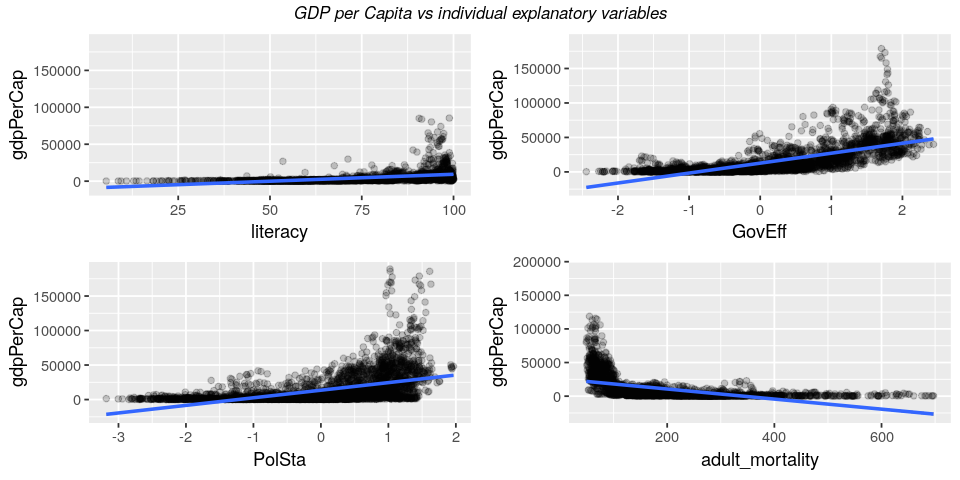

In [1671]:
p1 <- plot(literacy,gdpPerCap)
p2 <- plot(GovEff,gdpPerCap)
p3 <- plot(PolSta,gdpPerCap)
p4 <- plot(adult_mortality,gdpPerCap)
grid.arrange(p1,p2,p3,p4, ncol=2,nrow = 2, top = textGrob("GDP per Capita vs individual explanatory variables",gp=gpar(fontsize=10,font=3)))

If we examine the graphs, the data doesn't seem to be linear. The data needs to be transformed in some way so that it becomes linear and then only we can fit our model on it. Since the variation in GDP per capita is very high as compared to the independent variable, we try taking log of `gdpPerCapita`.

Warning message:
“Removed 9736 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 9736 rows containing missing values (geom_point).”Warning message:
“Removed 8191 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 8191 rows containing missing values (geom_point).”Warning message:
“Removed 8169 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 8169 rows containing missing values (geom_point).”Warning message:
“Removed 9427 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 9427 rows containing missing values (geom_point).”

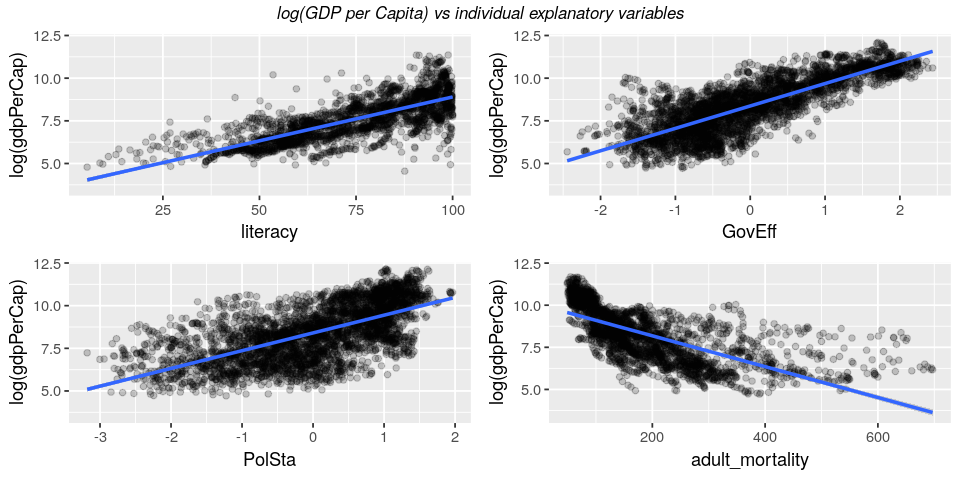

In [1672]:
p1 <- plot(literacy,log(gdpPerCap))
p2 <- plot(GovEff,log(gdpPerCap))
p3 <- plot(PolSta,log(gdpPerCap))
p4 <- plot(adult_mortality,log(gdpPerCap))
grid.arrange(p1,p2,p3,p4, ncol=2,nrow = 2,top = textGrob("log(GDP per Capita) vs individual explanatory variables",gp=gpar(fontsize=10,font=3)))

Now we can see that the data plot looks linear and now we will try to develop our model with `log(gdpPerCapita)` as dependent variable and analyze the coefficients. First we will check the correlation of each variable with `log(gdpPerCapita)`. 

In [1673]:
cor_log_data <- all_data %>%
    mutate(gdpPerCap = log(gdpPerCap)) %>%
    select(4,5,12,13,14) %>%
    drop_na()
cor(cor_log_data)

,gdpPerCap,literacy,GovEff,PolSta,adult_mortality
gdpPerCap,1.0000000,0.7212151,0.7081368,0.4886789,-0.6799315
literacy,0.7212151,1.0000000,0.5075622,0.3475635,-0.5619562
GovEff,0.7081368,0.5075622,1.0000000,0.5415220,-0.4958274
PolSta,0.4886789,0.3475635,0.5415220,1.0000000,-0.2192027
adult_mortality,-0.6799315,-0.5619562,-0.4958274,-0.2192027,1.0000000


* If we check the correlation matrix we find that the correlation of each variable has increased when we take log.
* Here we will not perform the entire elimination analysis of the 3 explanatory variable that we have already excluded as the VIF is not impacted by taking log of dependent variable.
* Now we will rebuild the model by just taking the log of the dependent variable.

In [1674]:
scaled_data_log <- scaled_data %>%
    mutate(gdpPerCap = log(gdpPerCap))
scaled_data_log %>% head()
print(paste("Total number of data points considered are :", nrow(scaled_data_log)))

gdpPerCap,literacy,GovEff,PolSta,adult_mortality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.916061,-1.1698690,-1.70043132,-2.05736877,1.81835304
7.291504,0.7173944,-0.93597972,-0.30145492,-0.53259268
8.229445,0.1973177,0.36832359,0.53973426,0.01142782
5.526277,-1.6072620,-1.61690340,-1.00278202,3.38241196
6.866279,0.4272847,0.08416409,0.07304369,-0.70745641
6.476960,-0.7098907,-0.81352254,-0.34436866,2.22636841


[1] "Total number of data points considered are : 482"


In [1675]:
model_log <- lm(scaled_data_log)
tidy(model_log)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),8.2199705,0.03207236,256.294528,0.000000e+00
literacy,0.4794363,0.04136489,11.590418,1.537768e-27
GovEff,0.4259060,0.04402412,9.674378,2.472628e-20
PolSta,0.1846111,0.03866572,4.774540,2.399794e-06
adult_mortality,-0.4151709,0.04092685,-10.144218,5.009579e-22


In [1676]:
car::vif(model_log)

literacy          GovEff          PolSta adult_mortality 
       1.659969        1.880258        1.450402        1.624998

In [1677]:
glance(model_log)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0.7406767,0.738502,0.7041326,340.6006,2.823517e-138,5,-512.3352,1036.67,1061.738,236.4979,477


## Final Conclusion:

* Taking log of `gdpPerCap` has increased the coefficient of determination from 0.44 to 0.74 which is a big improvement. So we can say the log model  better fits the data as compared to the simple model.
* The significance of all the coefficient has increased by a good margin and the standard error has decreased drastically.
* There has been complete reversal in the result about the importance of the variable. Literacy which was insignificant in the earlier model, has become the most important feature impacting GDP per capita of a country. The positive coefficient indicates that as the literacy increases the GDP per capita of a country increases.
* The next most important variable is adult mortality. The negative coefficient indicates that as the adult mortality increases GDP per capita decreases.
* Just slightly below adult mortality is government effectiveness. The effectiveness of the government will lead to increase in the GDP per capita of the country.
* Out of these 4 important variables, political stability ranks the lowest. As the political stability of a country will increase, GDP per capita will increase.
* The ranking of the features according to their impact on GDP per capita of the country is:
    1. Literacy (1st)
    2. Adult mortality (2nd)
    3. Government Effectiveness (3rd)
    4. Political Stability (4th)